In [1]:
import os
os.chdir('/home/eis/disk5/Kichang/EXPFL')
import sys
sys.path.insert(0, '/home/eis/disk5/Kichang/EXPFL')
import DataManager.datamanager as dm
from models.CNN import CNN
import torch

model = CNN(n_class=10)
model.load_state_dict(torch.load('./checkpoints/centralized/centralized_0.pt'))
model.dropout.p = 0.5
_, testset = dm.MNIST()
testloader = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=False, drop_last=False)


(10000, 10) (10000,)
self.entropy.shape (10000,)
0.39375496 0.021109408
(10000, 10) (10000,)
self.entropy.shape (10000,)
0.4239946 0.020031255
(10000, 10) (10000,)
self.entropy.shape (10000,)
0.79478073 0.056579217


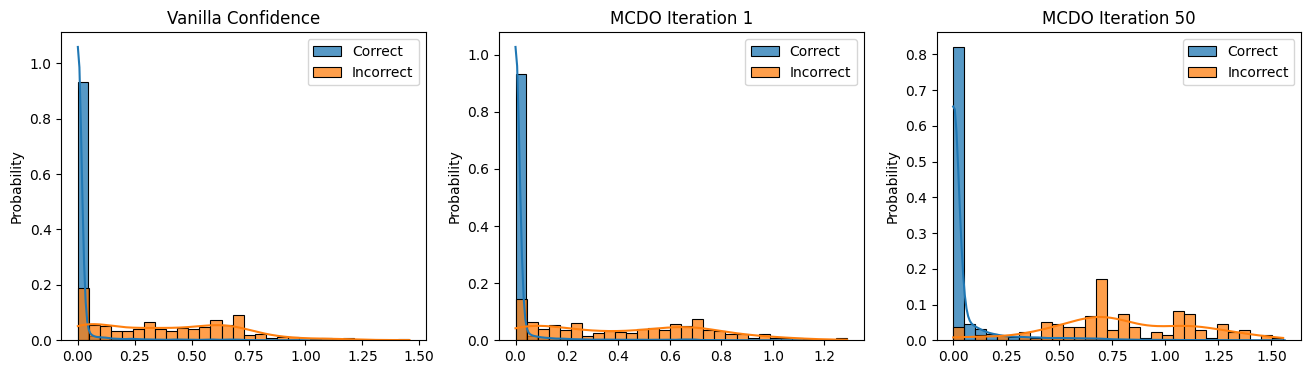

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from EAI.mcDropout import MCDropout

fig,axes = plt.subplots(1,3,figsize=(16,4))
dropouts = [False, True, True]
for idx, iteration in enumerate([1, 1, 50]):
    ax = axes[idx]
    MCDO = MCDropout()
    MCDO(model, testloader, iter=iteration)
    correct_idx = MCDO.preds==MCDO.targets
    incorrect_idx = MCDO.preds!=MCDO.targets
    print(np.mean(MCDO.entropy[incorrect_idx]), np.mean(MCDO.entropy[correct_idx]))
    sns.histplot(MCDO.entropy[correct_idx], stat='probability', kde=True, bins=30, label='Correct', alpha=0.75  ,ax=ax)
    sns.histplot(MCDO.entropy[incorrect_idx], stat='probability', kde=True, bins=30, label='Incorrect', alpha=0.75,ax=ax)
    ax.set_title(f'MCDO Iteration {iteration}' if dropouts[idx] else f'Vanilla Confidence')
    ax.legend()
plt.show()

(10000, 10) (10000,)
self.entropy.shape (10000,)
0.45102385 0.013341338 0.0 0.0
(10000, 10) (10000,)
self.entropy.shape (10000,)
0.59470445 0.021291867 0.048211634 0.0016613521
(10000, 10) (10000,)
self.entropy.shape (10000,)
0.62086654 0.022435859 0.05650037 0.001981413


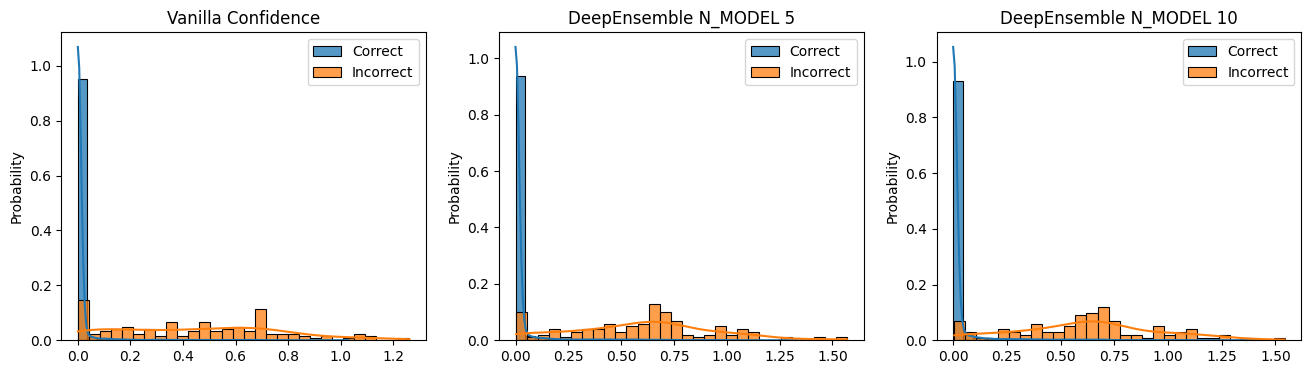

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from EAI.deepEnsemble import DeepEnsemble

fig,axes = plt.subplots(1,3,figsize=(16,4))

for idx, iteration in enumerate([1, 5, 10]):
    ax = axes[idx]
    model_paths = [f'./checkpoints/centralized/centralized_{i}.pt' for i in range(iteration)]
    DE = DeepEnsemble()
    DE(model, testloader, model_paths=model_paths)
    correct_idx = DE.preds==DE.targets
    incorrect_idx = DE.preds!=DE.targets
    print(np.mean(DE.entropy[incorrect_idx]), np.mean(DE.entropy[correct_idx]), DE.std_probs[incorrect_idx].mean(), DE.std_probs[correct_idx].mean())
    sns.histplot(DE.entropy[correct_idx], stat='probability', kde=True, bins=30, label='Correct', alpha=0.75  ,ax=ax)
    sns.histplot(DE.entropy[incorrect_idx], stat='probability', kde=True, bins=30, label='Incorrect', alpha=0.75,ax=ax)
    ax.set_title(f'DeepEnsemble N_MODEL {iteration}' if iteration!=1 else f'Vanilla Confidence')
    ax.legend()
plt.show()

(10000, 10) (10000,)
self.entropy.shape (10000,)
(10000, 10) (10000,)
self.entropy.shape (10000,)
(10000, 10) (10000,)
self.entropy.shape (10000,)


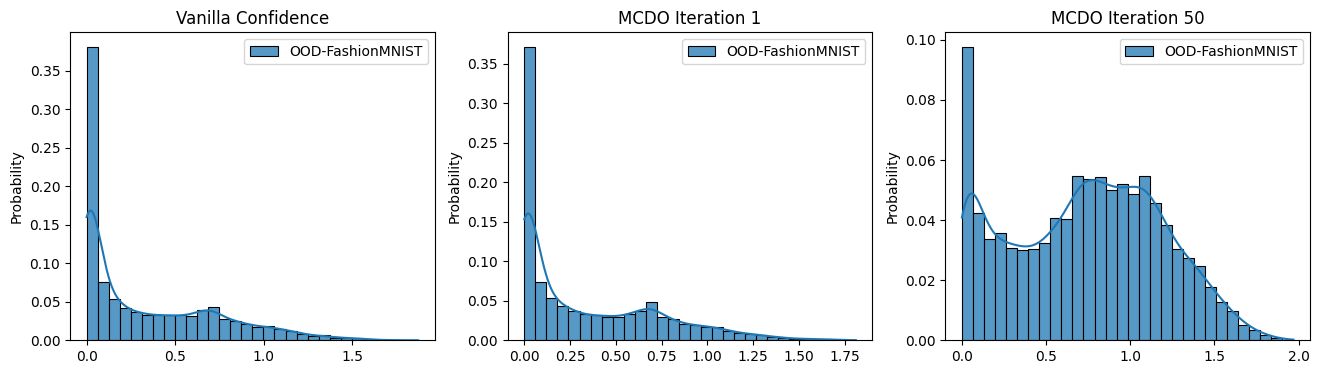

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from EAI.mcDropout import MCDropout

_, testset = dm.FashionMNIST()
testloader = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=False, drop_last=False)
fig,axes = plt.subplots(1,3,figsize=(16,4))
dropouts = [False, True, True]
for idx, iteration in enumerate([1, 1, 50]):
    ax = axes[idx]
    MCDO = MCDropout()
    MCDO(model, testloader, iter=iteration)
    sns.histplot(MCDO.entropy, stat='probability', kde=True, bins=30, label='OOD-FashionMNIST', alpha=0.75  ,ax=ax)
    ax.set_title(f'MCDO Iteration {iteration}' if dropouts[idx] else f'Vanilla Confidence')
    ax.legend()
plt.show()

(10000, 10) (10000,)
self.entropy.shape (10000,)
(10000, 10) (10000,)
self.entropy.shape (10000,)
(10000, 10) (10000,)
self.entropy.shape (10000,)


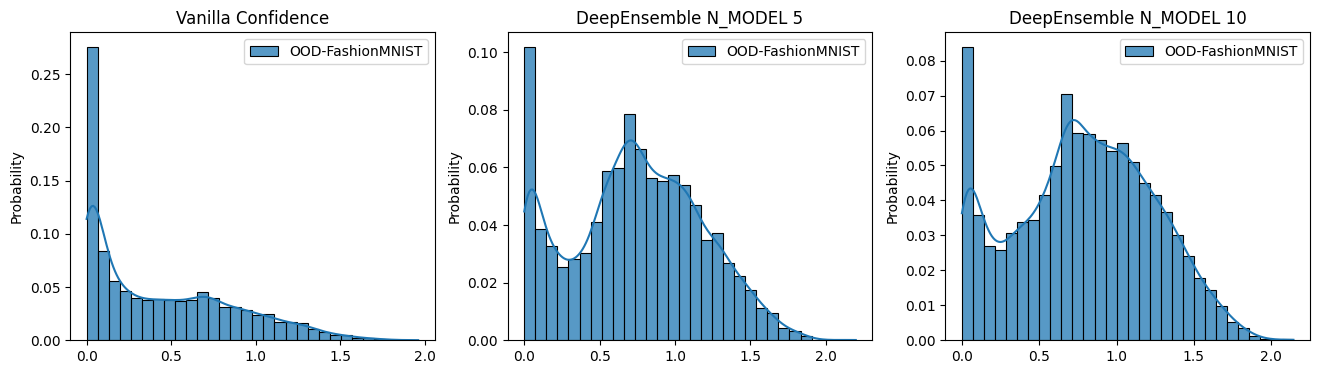

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from EAI.deepEnsemble import DeepEnsemble

fig,axes = plt.subplots(1,3,figsize=(16,4))

for idx, iteration in enumerate([1, 5, 10]):
    ax = axes[idx]
    model_paths = [f'./checkpoints/centralized/centralized_{i}.pt' for i in range(iteration)]
    DE = DeepEnsemble()
    DE(model, testloader, model_paths=model_paths)
    sns.histplot(DE.entropy, stat='probability', kde=True, bins=30, label='OOD-FashionMNIST', alpha=0.75,ax=ax)
    ax.set_title(f'DeepEnsemble N_MODEL {iteration}' if iteration!=1 else f'Vanilla Confidence')
    ax.legend()
plt.show()

(18800, 10) (18800,)
self.entropy.shape (18800,)
(18800, 10) (18800,)
self.entropy.shape (18800,)
(18800, 10) (18800,)
self.entropy.shape (18800,)


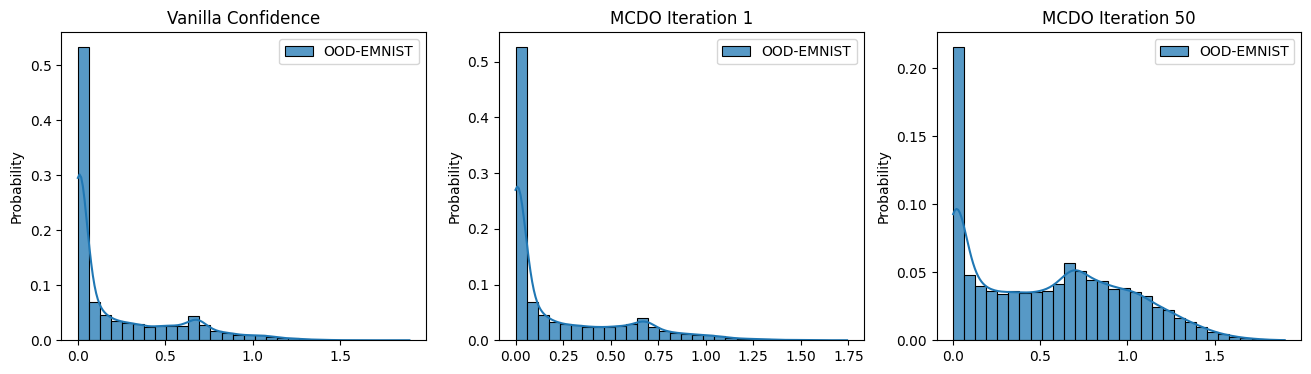

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from EAI.mcDropout import MCDropout

_, testset = dm.EMNIST()
testloader = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=False, drop_last=False)
fig,axes = plt.subplots(1,3,figsize=(16,4))
dropouts = [False, True, True]
for idx, iteration in enumerate([1, 1, 50]):
    ax = axes[idx]
    MCDO = MCDropout()
    MCDO(model, testloader, iter=iteration)
    sns.histplot(MCDO.entropy, stat='probability', kde=True, bins=30, label='OOD-EMNIST', alpha=0.75  ,ax=ax)
    ax.set_title(f'MCDO Iteration {iteration}' if dropouts[idx] else f'Vanilla Confidence')
    ax.legend()
plt.show()

(18800, 10) (18800,)
self.entropy.shape (18800,)
(18800, 10) (18800,)
self.entropy.shape (18800,)
(18800, 10) (18800,)
self.entropy.shape (18800,)


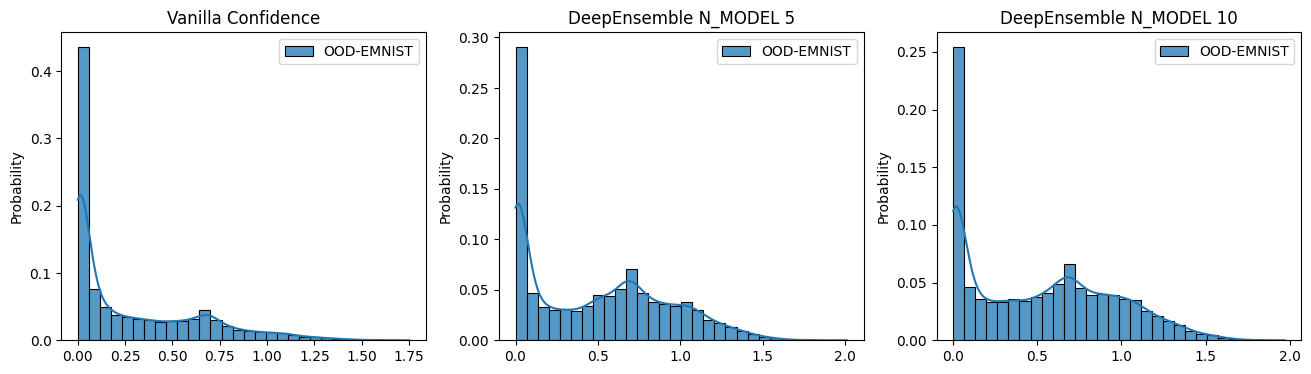

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from EAI.deepEnsemble import DeepEnsemble

fig,axes = plt.subplots(1,3,figsize=(16,4))

for idx, iteration in enumerate([1, 5, 10]):
    ax = axes[idx]
    model_paths = [f'./checkpoints/centralized/centralized_{i}.pt' for i in range(iteration)]
    DE = DeepEnsemble()
    DE(model, testloader, model_paths=model_paths)
    sns.histplot(DE.entropy, stat='probability', kde=True, bins=30, label='OOD-EMNIST', alpha=0.75,ax=ax)
    ax.set_title(f'DeepEnsemble N_MODEL {iteration}' if iteration!=1 else f'Vanilla Confidence')
    ax.legend()
plt.show()